In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
img_f = cv2.imread('homotest.jpg',0) 
th,img_f = cv2.threshold(img_f, 130, 255, cv2.THRESH_BINARY)

In [3]:
import cv2
import numpy as np

filename = 'homotest.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

dst = cv2.dilate(dst,None)

img[dst>0.01*dst.max()]=[0,0,255]
print(img[dst>0.01*dst.max()])

plt.imshow(img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


[2.0335240e+02 1.5991053e-01]
[300.69318 297.01135]
[607.98987 299.84827]
[590.0024  293.48404]
[600.7856  302.84995]
[298.83145 597.6292 ]
[598.50726 597.89856]


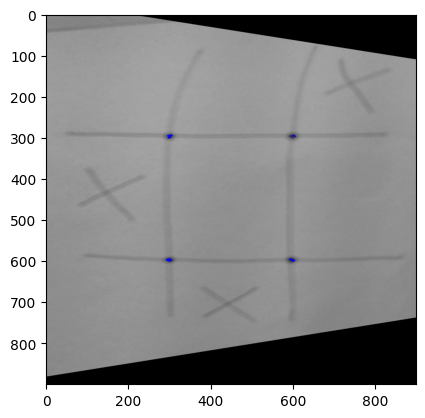

In [ ]:
import cv2
import numpy as np

img = cv2.imread('homotest.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,5,3,0.04)
ret, dst = cv2.threshold(dst,0.1*dst.max(),255,0)
dst = np.uint8(dst)
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
for i in range(1, len(corners)):
    print(corners[i])
img[dst>0.1*dst.max()]=[0,0,255]
plt.imshow( img)


In [ ]:
def detect_lines(img,thresh_value):
#     gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray=img
    th,gray = cv2.threshold(gray,thresh_value, 255, cv2.THRESH_BINARY)
#     plt.imshow(gray)

    kernel_size = 5
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
    low_threshold =50
    high_threshold = 150
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

    rho = 1  # distance resolution in pixels of the Hough grid
    theta = np.pi / 180  # angular resolution in radians of the Hough grid
    threshold = 70 # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 50  # minimum number of pixels making up a line
    max_line_gap = 20  # maximum gap in pixels between connectable line segments
    line_image = np.copy(img) * 0  # creating a blank to draw lines on

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)
    print(lines)
    isX=0
    try:
        if(lines==None):
            print("Circle")
    except:
        if(len(lines)<1):
            print("Circle")

        else:
            print("X detected")
            isX=1

            for line in lines:
                for x1,y1,x2,y2 in line:
                    cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)

            # Draw the lines on the  image
            lines_edges = cv2.addWeighted(img, 0.8, line_image, 1, 0)
            plt.imshow(lines_edges)
    return isX

[[[ 29  45 117 133]]

 [[ 87  86 164 163]]]
X detected
1
[[[ 50  40 123  89]]

 [[ 67   4 121   4]]]
X detected
1
None
Circle
0
None
Circle
0


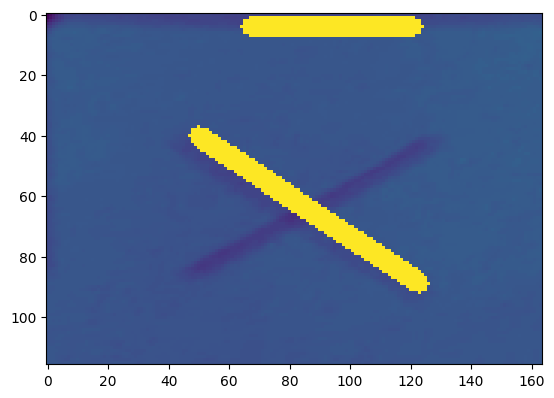

In [ ]:
x1= cv2.imread('ok1.png',0)
x2= cv2.imread('x2.png',0)
c1= cv2.imread('c1.png',0)
c2= cv2.imread('c2.png',0)

a=[x1,x2,c1,c2]
thresh=[150,134,140,132]
for i in range(0,4):
    print(detect_lines(a[i],thresh[i]))

[[[ 29  45 117 133]]

 [[ 87  86 164 163]]]
X detected
[[[ 29  45 117 133]]

 [[ 87  86 164 163]]]


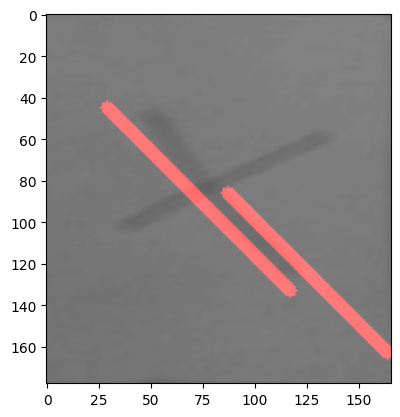

In [ ]:
# img = cv2.imread('ok1.png')
img = cv2.imread('ok1.png')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
th,gray = cv2.threshold(gray,150, 255, cv2.THRESH_BINARY)
plt.imshow(gray,cmap="gray")
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
low_threshold =50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 70 # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)
print(lines)
try:
    if(lines==None):
        print("Circle")
except:
    if(len(lines)<=1):
        print("Circle")
    
    else:
        print("X detected")
        print(lines)

        for line in lines:
            for x1,y1,x2,y2 in line:
                cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)

        # Draw the lines on the  image
        lines_edges = cv2.addWeighted(img, 0.8, line_image, 1, 0)
        plt.imshow(lines_edges)

[[  0   0 255]
 [  0   0 255]
 [  0   0 255]
 ...
 [  0   0 255]
 [  0   0 255]
 [  0   0 255]]


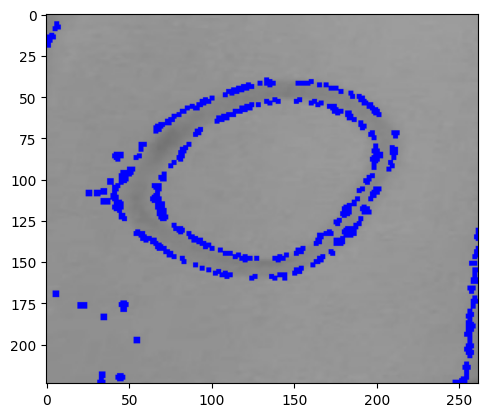

In [ ]:
import cv2
import numpy as np

filename = 'c1.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
th,gray = cv2.threshold(gray,140, 255, cv2.THRESH_BINARY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
img[dst>0.01*dst.max()]=[0,0,255]
print(img[dst>0.01*dst.max()])

plt.imshow(img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

[[  0   0 255]
 [  0   0 255]
 [  0   0 255]
 ...
 [  0   0 255]
 [  0   0 255]
 [  0   0 255]]


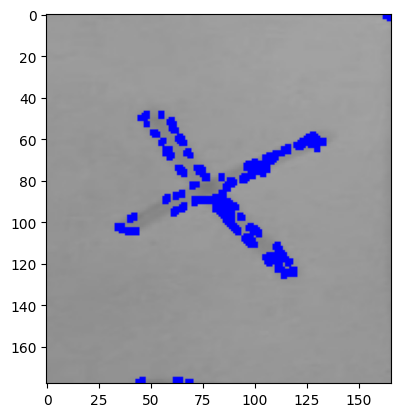

In [ ]:
import cv2
import numpy as np

filename = 'ok1.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
th,gray = cv2.threshold(gray,140, 255, cv2.THRESH_BINARY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

dst = cv2.dilate(dst,None)

print(img[dst>0.01*dst.max()])

plt.imshow(img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

Circle


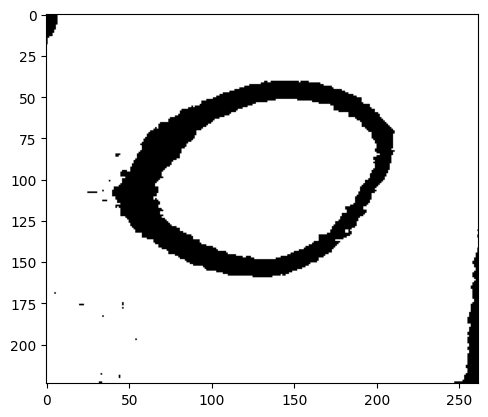

In [ ]:
# img = cv2.imread('ok1.png')
img = cv2.imread('c1.png')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
th,gray = cv2.threshold(gray,140, 255, cv2.THRESH_BINARY)
plt.imshow(gray,cmap="gray")
# exit(0)
# break
# gray=o3
# img=o3
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
low_threshold =50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 70 # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

if(lines==None):
    print("Circle")
else:
    print("aaaa")
    print(lines)

    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)

    # Draw the lines on the  image
    lines_edges = cv2.addWeighted(img, 0.8, line_image, 1, 0)
    plt.imshow(lines_edges)

None
Circle


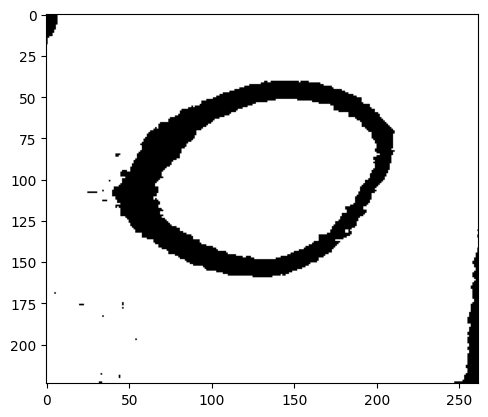

In [ ]:
# img = cv2.imread('ok1.png')
img = cv2.imread('c1.png')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
th,gray = cv2.threshold(gray,140, 255, cv2.THRESH_BINARY)
plt.imshow(gray,cmap="gray")

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
low_threshold =50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 70 # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)
print(lines)
try:
    if(lines==None):
        print("Circle")
except:
    if(len(lines)<=1):
        print("Circle")
    
    else:
        print("X detected")
        print(lines)

        for line in lines:
            for x1,y1,x2,y2 in line:
                cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)

        # Draw the lines on the  image
        lines_edges = cv2.addWeighted(img, 0.8, line_image, 1, 0)
        plt.imshow(lines_edges)

None
Circle


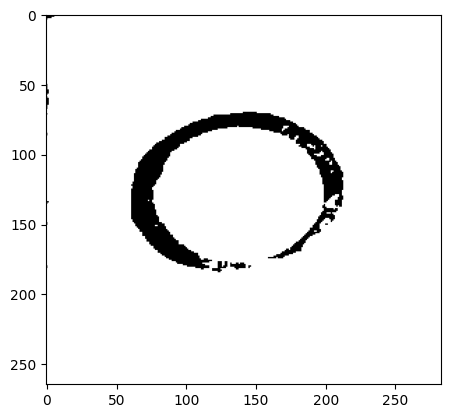

In [ ]:
# img = cv2.imread('ok1.png')
img = cv2.imread('c2.png')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
th,gray = cv2.threshold(gray,132, 255, cv2.THRESH_BINARY)
plt.imshow(gray,cmap="gray")

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
low_threshold =50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 70 # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)
print(lines)
try:
    if(lines==None):
        print("Circle")
except:
    if(len(lines)<=1):
        print("Circle")
    
    else:
        print("X detected")
        print(lines)

        for line in lines:
            for x1,y1,x2,y2 in line:
                cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)

        # Draw the lines on the  image
        lines_edges = cv2.addWeighted(img, 0.8, line_image, 1, 0)
        plt.imshow(lines_edges)

## Template Matching

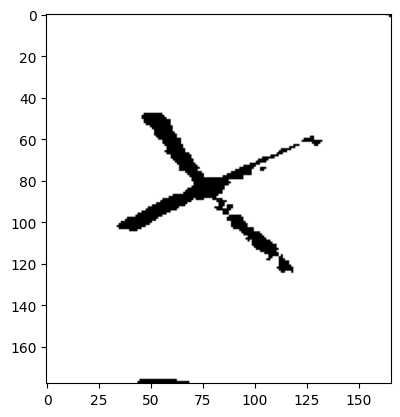

In [ ]:
img = cv2.imread('ok1.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
th,gray = cv2.threshold(gray,140, 255, cv2.THRESH_BINARY)
plt.imshow(gray,cmap="gray")


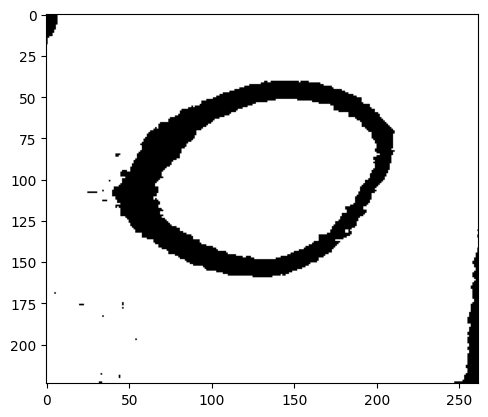

In [ ]:
img = cv2.imread('c1.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
th,gray = cv2.threshold(gray,140, 255, cv2.THRESH_BINARY)
plt.imshow(gray,cmap="gray")

In [ ]:
#get corners 
#get list of coordinates and pass into get_subs

def get_subs():
#     return list of subimages in row major order
    pass

In [ ]:
def my_ex(img):

    h,w=img.shape
    hn=int(h/2)
    wn=int(w/2)
    ex=0
    template = cv2.imread('x_orig.png',0)
    img2 = img.copy()
    w, h = template.shape[::-1]
    
#     minh=min(template.shape[0],img.shape[0])
#     minw=min(template.shape[1],img.shape[1])
#     template=template[0:minh,0:minw]
#     img=img[0:minh,0:minw]
    
    # methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED']
    methods = ['cv2.TM_CCOEFF_NORMED']
    for meth in methods:
        img = img2.copy()
        method = eval(meth)
        # Apply template Matching
        res = cv2.matchTemplate(img,template,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv2.rectangle(img,top_left, bottom_right, 0, 2)
        print(top_left)
        print(bottom_right)

        if(top_left[0]<hn and bottom_right[0]>hn and top_left[1]<wn and bottom_right[1]>wn):
            print("YES")
            ex=1
        else:
            print("NO")
            ex=0

        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(img,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        plt.suptitle(meth)
        plt.show()
        
    return ex
    

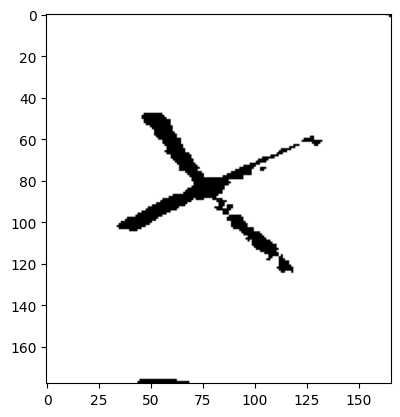

In [ ]:
xx=cv2.imread("ok1.png",0)
th,xx = cv2.threshold(xx,140, 255, cv2.THRESH_BINARY)
plt.imshow(xx,cmap="gray")

In [ ]:
my_ex(xx)

(28, 3)
(276, 284)
YES


1

In [ ]:
xx1=cv2.imread("x2.png",0)
th,xx1 = cv2.threshold(xx1,135, 255, cv2.THRESH_BINARY)
plt.imshow(xx1,cmap="gray")

In [ ]:
my_ex(xx)

(28, 3)
(276, 284)
YES


1

In [4]:
def shi_tomashi(image):
    # gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray = image.copy()
    corners = cv2.goodFeaturesToTrack(gray, 4, 0.01, 100)
    corners = np.int0(corners)
    corners = sorted(np.concatenate(corners).tolist())
    print('\nThe corner points are...\n')

    im = image.copy()
    for index, c in enumerate(corners):
        x, y = c
        cv2.circle(im, (x, y), 3, 255, -1)
        character = chr(65 + index)
        print(character, ':', c)
        cv2.putText(im, character, tuple(c), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv2.LINE_AA)

    plt.figure(2)
    plt.imshow(im)
    plt.title('Corner Detection: Shi-Tomashi')
    return corners

img = cv2.imread('test.png',0)

destPoints = [[300,300], [300,600], [600,300], [600,600]]

corners = shi_tomashi(img)
mat = cv2.getPerspectiveTransform(np.float32(corners), np.float32(destPoints))

warped = cv2.warpPerspective(img, mat, (900, 900))

data = np.uint8([[0]*900]*900)
data = cv2.circle(data, (450, 750), 90, (255,0,0), 5)

warpedData = cv2.warpPerspective(data, np.linalg.inv(mat), (img.shape[1], img.shape[0]))

plt.figure(1)
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
# plt.imshow(warped, cmap='gray')
# plt.imshow(warpedData, cmap='gray')
plt.imshow(img+warpedData, cmap='gray')

plt.figure(3)
plt.imshow(warped, cmap='gray')

plt.show()


The corner points are...

A : [280, 259]
B : [352, 437]
C : [540, 211]
D : [616, 382]


In [5]:
import cv2
x_img = cv2.imread('x.png', 0)
o_img = cv2.imread('o.png', 0)
game_state = np.empty((3,3),dtype= 'object')

th, warped = cv2.threshold(warped, 172, 255, cv2.THRESH_BINARY)
plt.imshow(warped, cmap='gray')

img2 = warped[0:300, 0:300]
orb = cv2.ORB_create(nfeatures=500)
kp1, des1 = orb.detectAndCompute(x_img, None)
kp2, des2 = orb.detectAndCompute(o_img, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
destPoints = [[300,300], [300,600], [600,300], [600,600]]
NoneType=type(None)

kp_x, des_x = orb.detectAndCompute(x_img, None)
kp_o, des_o = orb.detectAndCompute(o_img, None)
count=0
intersec_coords =[300,600,900]
for i in range(len(intersec_coords)):
	for j in range(len(intersec_coords)):
		img2 = warped[intersec_coords[i]-300:intersec_coords[i], intersec_coords[j]-300:intersec_coords[j]]
		rb = cv2.ORB_create(nfeatures=500)
		kp2, des2 = orb.detectAndCompute(img2, None)
	
		if type(des_x)!=NoneType and type(des2)!=NoneType:
			bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
			matches = bf.match(des_x, des2)
			matches = sorted(matches, key=lambda x: x.distance)
			#matches_o = bf.match(des_o, des2)
			# matches_o = sorted(matches_o, key=lambda x: x.distance)
			print("x--Matchin Points--"+str(len(matches))+"--"+str(count))
			if(len(matches)>46):
				game_state[i][j]="X"
			match_img = cv2.drawMatches(x_img, kp1, img2, kp2, matches[:50], None)
			# cv2.imshow('original image', x_img)
			# cv2.imshow('test image', img2)
			# cv2.imshow('Matches', match_img)
			# cv2.waitKey(2000)
			# cv2.destroyAllWindows()
		# if type(des_o)!=NoneType and type(des2)!=NoneType:
		# 	bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
		# 	matches = bf.match(des_o, des2)
		# 	matches = sorted(matches, key=lambda x: x.distance)
		# 	print("o"+str(len(matches))+"--"+str(count))
		# 	#match_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None)
		# 	#cv2.imshow('original image', img1)
		# 	cv2.imshow('test image', img2)
		# 	#cv2.imshow('Matches', match_img)
		# 	#cv2.waitKey(2000)
		# 	cv2.destroyAllWindows()
		count+=1

print(game_state)


x--Matchin Points--50--0
x--Matchin Points--45--1
x--Matchin Points--47--3
x--Matchin Points--54--4
x--Matchin Points--43--5
x--Matchin Points--33--6
x--Matchin Points--52--8
[['X' None None]
 ['X' 'X' None]
 [None None 'X']]
